# 1.1 수학과 파이썬 복습  

## 1.1.1 벡터와 행렬  

벡터: 크기와 방향을 가진 양-1차원 배열  
행렬:2차원 형태의 숫자-2차원 배열 (row & column으로 이뤄진)  

In [1]:
import numpy as np
x=np.array([1,2,3])
x.__class__#클래스 이름 표시  

numpy.ndarray

In [2]:
x.shape#3개의 원소 형상

(3,)

In [3]:
x.ndim#1

1

In [4]:
W=np.array([[1,2,3],[4,5,6]])
W.shape

(2, 3)

In [5]:
W.ndim#2

2

## 1.1.2 행렬의 원소별 연산  

In [6]:
W=np.array([[1,2,3],[4,5,6]])
X=np.array([[0,1,2],[3,4,5]])
W+X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [7]:
W*X

array([[ 0,  2,  6],
       [12, 20, 30]])

## 1.1.3 브로드캐스트  
브로드캐스트:다차원배열연산에서 형상이 다른 배열끼리 연산을 가능하게 함  

In [8]:
A=np.array([[1,2],[3,4]])
A*10#배열의 원소에 스칼라값 곱하기

array([[10, 20],
       [30, 40]])

In [9]:
A=np.array([[1,2],[3,4]])
b=np.array([10,20])
A*b
#10*1   20*2
#10*3   20*4

array([[10, 40],
       [30, 80]])

## 1.1.4 벡터의 내적과 행렬의 곱  
벡터의 내적은 직관적으로 '두 벡터가 얼마나 같은 방향을 향하고 있는가'를 나타낸다.  
ex)벡터의 길이가 1인 경우로 한정하면 같은 방향을 향하면 내적은 1, 180도 반대 방향이면 -1이다  

In [10]:
a=np.array([1,2,3])
b=np.array([4,5,6])
np.dot(a,b)#내적-32

32

In [11]:
A=np.array([[1,2],[3,4]])
B=np.array([[5,6],[7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

## 1.1.5 행렬 형상 확인  
행렬 A,B가 있을때 A의 열의 수,B의 행의 수가 같아야 함  
ex)A(3,2)xB(2,4)=C(3,4)

# 1.2 신경망의 추론  
2차원 데이터를 입력하여 3차원 데이터를 출력하는 함수 생성  
ex)입력층 뉴런 2개, 출력층 뉴런 3개, 은닉층에도 뉴런 4개를 둔다고 가정  
- 가중치와 뉴런의 값을 각각 곱해서 그 합이 다음 뉴런의 입력으로 쓰임  

- 각층에서 이전 뉴런의 영향을 안 받는 정수인 편향이 더해짐  
완전연결계층:인접하는 층의 모든 뉴런과 연결됨  
h1=x1w11+x2w21+b1  
- 특징: 은닉층의 뉴런은 가중치의 합으로 계산됨->행렬의 곱으로 한꺼번에 계산 가능  
h=xW+b  
h:은닉층의 뉴런  
x:입력  
W:가중치  
b:편향  

신경망의 추론,학습에서는 다수의 샘플데이터를 하나씩 저장해야한다  

In [12]:
W1=np.random.randn(2,4)#가중치
b1=np.random.randn(4)#편향  
x=np.random.randn(10,2)#입력
h=np.matmul(x,W1)+b1

In [13]:
def sigmoid(x):#시그모이드 함수
    return 1/(1+np.exp(-x))

In [14]:
a=sigmoid(h)#은닉층 뉴런 반환 및 활서오하함수의 출력a를 다른 완전연결계층에 통과시켜 변환
a

array([[0.29298219, 0.38512666, 0.92170363, 0.21782574],
       [0.28006478, 0.80451108, 0.59288028, 0.22825309],
       [0.20371377, 0.54267812, 0.87820004, 0.24380027],
       [0.07008723, 0.65762538, 0.88227876, 0.31284609],
       [0.01192408, 0.26501026, 0.99158053, 0.41967042],
       [0.13614876, 0.39067415, 0.94779679, 0.26628689],
       [0.08226736, 0.81434013, 0.73143686, 0.30673178],
       [0.67218447, 0.68370082, 0.57705908, 0.15612593],
       [0.15136841, 0.45120521, 0.928252  , 0.26082032],
       [0.37030593, 0.31307548, 0.93446092, 0.20079528]])

In [15]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
x=np.random.randn(10,2)
W1=np.random.randn(2,4)
b1=np.random.randn(4)
W2=np.random.randn(4,3)
b2=np.random.randn(3)

h=np.matmul(x,W1)+b1
a=sigmoid(h)
s=np.matmul(a,W2)+b2#출력된 3차원 벡터의 각 차원은 각 클래스에 대응하는 점수  

점수:확률적 개념.점수가 높을수록 뉴런에 해당하는 클래스의 확률도 높아진다.  
- 점수를 softmax함수에 넣으면 확률을 얻음  

## 1.2.2 계층으로 클래스화 및 순전파 구현  


완전연결계층(Affine)계층,시그모이드 함수에 의한 변환(sigmoid)계층  
모든 계층은 forward(),backward()메서드를 가짐  
모든 계층은 인스턴스변수 params,grads를 가짐(params-가중치,편향 매개변수를 담는 리스트,grads-기울기 담는 리스트)  

In [16]:
#순전파
import numpy as np
class Sigmoid:#시그모이드 계층
    def __init__(self):
        self.params=[]
    def forward(self,x):
        return 1/(1+np.exp(-x))
class Affine:#완전연결계층
    def __init__(self,W,b):
        self.params=[W,b]
    def forward(self,x):#순전파 구현
        W,b=self.params
        out=np.matmul(x,W)+b
        return out    

신경망의 계층 구성:입력X->Affine->Sigmoid->Affine->S(점수)

In [17]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size):#초기화 메서드-가중치 초기화
        I,H,O=input_size,hidden_size,output_size
        #가중치와 편향 초기화
        W1=np.random.randn(I,H)
        b1=np.random.randn(H)
        W2=np.random.randn(H,O)
        b2=np.random.randn(O)
        #3개의 계층 생성
        self.layers=[
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2)
        ]
        #모든 가중치를 리스트에 모은다  
        self.params=[]#params에 모든 학습 매개변수를 다 담음
        for layer in self.layers:
            self.params+=layer.params
    def predict(self,x):#입력데이터x에 대한 점수s를 구함
        for layer in self.layers:
            x=layer.forward(x)
        return x

In [18]:
x=np.random.randn(10,2)
model=TwoLayerNet(2,4,3)
s=model.predict(x)
s#점수들 출력

array([[ 1.57396877, -1.50722388,  1.0296036 ],
       [ 2.14935137, -1.92002784,  1.07291756],
       [ 2.0293449 , -1.81227732,  1.18924288],
       [ 1.97326208, -1.77545126,  1.28440182],
       [ 1.76097649, -1.43860223,  0.61729865],
       [ 1.86566347, -1.67719564,  0.99980495],
       [ 1.89734538, -1.67822277,  0.70356914],
       [ 2.04632981, -1.82346522,  1.10643132],
       [ 1.69496182, -1.56137741,  1.04877485],
       [ 2.34173582, -2.10112891,  0.98908407]])

## 1.3 신경망의 학습  
신경망의 학습은 최적의 매개변수값을 찾는 작업  

## 1.3.1 손실함수  
손실:학습단계의 특정 시점에서 신경망의 성능을 나타내는 척도  
- 학습데이터와 신경망의 예측값을 비교해서 예측이 얼마나 나쁜가를 산출한 스칼라값  

손실함수:다중클래스 분류 신경망에서는 손실함수로 흔히 교차엔트로피 오차를 이용.

교차 엔트로피 오차  
- 신경망이 출력하는 각 클래스의 확률과 정답 레이블을 이용해 구함  

softmax계층:소프트맥스 함수 구하는 계층  
cross entropy error계층:교차 엔트로피 구하는 계층  

손실함수를 적용한 신경망의 계층 구성:
X->Affine->Sigmoid->Affine->Softmax->cross entropy error->L  
cf) 이때 x입력데이터,t정답데이터,L손실이다  
cf) softmax계층의 출력은 확률로 교차 엔트로피 오차계층에는 확률과 정답레이블이 입력됨  
Yk:k번째 클래스에 해당하는 소프트맥스 함수의 출력  
분자:점수 Sk의 지수함수  
분모:모든 입력신호의 지수함수의 총합  

미니배치 처리를 고려한 교차 엔트로피 오차 식에서...  
N:데이터의 개수    
tnk:n번째 데이터의 k차원째의 값-정답레이블   
Ynk:신경망의 출력  

softmax with loss계층:소프트맥스 함수와 교차 엔트로피 오차를 계산하는 계층  
입력X->Affine->Sigmoid->Affine->Softmax with loss->L  

## 1.3.2 미분과 기울기  
미분 dx/dy=x의 값을 조금변화시켰을때 y값이 얼마나 변하냐의 정도  
기울기:벡터의 각 원소에 대한 미분  
행렬에서의 기울기:L의 W에 대한 기울기를 행렬로 정리시, '행렬과 그 기울기의 형상은 같다'  

## 1.3.3 연쇄법칙  
오차역전파법:신경망의 기울기, 연쇄법칙사용  
연쇄법칙:합성함수에 대한 미분의 법칙  


## 1.3.4 계산 그래프  
계산그래프에서는 연산을 노드로 나타내고 그 처리 결과가 순서대로 흐른다(왼쪽->오른쪽(순전파))  
역전파:기울기가 순전파와 반대방향으로 전파되는 것  
역전파로 흐르는 미분값은 상류로부터 흐르는 미분과 각 연산노드의 국소적인 미분을 곱해 계산  

곱셈노드의 역전파:상류로부터 받은 기울기에 순전파시 입력을 서로 바꾼 값을 곱함  
분기노드:선이 두개가 되도록 나눠 그림, 상류에서 온 기울기들의 합  

repeat노드:2개로 분기하는 분기노드를 일반화(N개로의 복제 및 분기)  

In [19]:
import numpy as np
D,N=8,7
x=np.random.randn(1,D)#입력
y=np.repeat(x,N,axis=0)#순전파
dy=np.random.randn(N,D)#무작위 기울기
dx=np.sum(dy,axis=0,keepdims=True)#역전파  keepdims=True로 하면 2차원 배열의 차원 수 유지

Sum노드-범용 덧셈 노드  
- 역전파는 상류로부터 기울기를 모든 화살표에 분배  

In [20]:
D,N=8,7
x=np.random.randn(N,D)#입력
y=np.sum(x,axis=0,keepdims=True)#순전파  
dy=np.random.randn(1,D)#무작위 기울기 
dx=np.repeat(dy,N,axis=0)#역전파

#### 행렬에서 matmul노드의 역전파  
W가 관여하는 이유:곱셈의 역전파에서 순전파의 입력을 서로 바꾼 값을 사용했듯이, 행렬의 역전파에서도 순전파시 입력을 서로 바꾼 행렬을 사용해서 행렬곱을 조합한다  


In [21]:
class MatMul:
    def __init__(self,W):
        self.params=[W]
        self.grads=[np.zeros_like(W)]
        self.x=None
    def forward(self,x):
        W,=self.params
        out=np.matmul(x,W)
        self.x=x
        return out
    def backward(self,dout):
        W,=self.params
        dx=np.matmul(dout,W.T)
        dW=np.matmul(self.X.T,dout)
        self.grads[0][...]=dW#깊은 복사
        return dx
#생략기호 사용:변수의 메모리 주소 고정

In [22]:
a=np.array([1,2,3])
b=np.array([4,5,6])
#a=b와 a[..]=b의 차이:
#생략기호...는 데이터를 덮어써서 변수가 가리키는 메모리 위치는 변하지 않음

## 1.3.5 기울기 도출과 역전파 구현  
Sigmoid계층 구현  
출력쪽 계층으로부터 전해진 기울기에 시그모이드함수의 미분y(1-y)를 곱해서 값을 입력쪽 계층으로 전파  

In [23]:
class Sigmoid:
    def __init__(self):
        self.params,self.grads=[],[]
        self.out=None
    def forward(self,x):#순전파때는 출력을 out변수에 저장
        out=1/(1+np.exp(-x))
        self.out=out
        return out
    def backward(self,dout):#역전파때 out변수 활용:기울기에 y(1-y)형태 곱하기
        dx=dout*(1.0-self.out)*self.out
        return dx

Affine계층 구현  
순전파때는 y=np.matmul(x,W)+b로 구현가능  
편향을 더할때는 numpy의 브로드캐스트가 사용됨  
matmul노드로 행렬곱을 계산하고 ㅕㄴ향은 repeat노드에 의해 복제 후 더해짐  

In [24]:
class Affine:
    def __init__(self,W,b):
        self.params=[W,b]
        self.grads=[np.zeros_like(W),np.zeros_like(b)]
        self.x=None
    def forward(self,x):
        W,b=self.params
        out=np.matmul(x,W)+b
        self.x=x
        return out
    def backward(self,dout):#역전파는 sum메서드로 계산 가능하고 가중치 매개변수기울기를 grads에 저장
        W,b=self.params
        dx=np.matmul(dout,W.T)
        dW=np.matmul(self.x.T,dout)
        db=np.sum(dout,axis=0)
        self.grads[0][...]=dW
        self.grads[1][...]=db
        return dx

#### Softmax with Loss계층  
3-클래스 분류를 가정하여 이전계층(입력층에 가까운 계층)으로부터 3개의 입력을 받도록 함  
입력 (a1,a2,a3)를 정규화해서 (y1,y2,y3)를 출력  
cross entropy error계층은 softmax출력(y1,y2,y3)와 정답레이블 (t1,t2,t3)를 받고 이로부터 손실L을 구해 출력

In [25]:
class Softmax:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        self.out = softmax(x)
        return self.out

    def backward(self, dout):
        dx = self.out * dout
        sumdx = np.sum(dx, axis=1, keepdims=True)
        dx -= self.out * sumdx
        return dx

In [26]:
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

In [27]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
    if t.size == y.size:
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]

    cross_entropy = np.log(y[np.arange(batch_size), t] + 1e-7)
    loss = -np.sum(cross_entropy) / batch_size
    
    return loss

In [28]:
import sys
import numpy as np

class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  #softmax의 출력
        self.t = None  #정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        if self.t.size == self.y.size:#원핫벡터로 변환(t가 원핫벡터면 정답인덱스로 변환argmax)
            self.t = self.t. argmax(axis=1)
        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = self.y.copy()#복사
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx /= batch_size
        return dx

## 1.3.6 가중치 갱신  
1단계:미니배치    
- 훈련데이터 중에서 무작위로 다수의 데이터를 골라낸다   

2단계:기울기 계산  
- 오차 역전파법으로 각 가중치 매개변수에 대한 손실함수의 기울기를 구한다  

3단계:매개변수 갱신  
- 기울기를 사용하여 가중치 매개변수를 갱신한다  

4단계:반복  
- 1~3단계를 필요한 만큼 반복한다  

경사하강법:매개변수를 그 기울기와 반대방향으로 갱신하면 손실을 줄일 수 있어서 사용  
SGD확률적경사하강법:현재의 가중치를 기울기 방향으로 일정한 거리만큼 갱신  
W:갱신하는 가중치 매개변수  
params,grads:각각 신경망의 가중치, 기울기를 리스트형식으로 저장  

In [29]:
class SGD:
    def __init__(self,lr=0.01):
        self.lr=lr
    def update(self,params,grads):
        for i in range(len(params)):
            params[i]-=self.lr*grads[i]

# 1.4 신경망으로 문제를 풀다  

## 1.4.1 스파이럴 데이터셋 

In [30]:
import numpy as np

def load_data(seed=1984):
    np.random.seed(seed)
    N = 100  # 클래스당 샘플 수
    DIM = 2  # 데어터 요소 수
    CLS_NUM = 3  # 클래스 수

    x = np.zeros((N*CLS_NUM, DIM))
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)

    for j in range(CLS_NUM):
        for i in range(N): # N*j, N*(j+1)):
            rate = i / N
            radius = 1.0*rate
            theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

            ix = N*j + i
            x[ix] = np.array([radius*np.sin(theta),
                              radius*np.cos(theta)]).flatten()
            t[ix, j] = 1

    return x, t

In [31]:
import sys
sys.path.append('..')#부모 디렉토리 파일을 가져오도록 설정
from common import spiral
import matplotlib.pyplot as plt
x,t=spiral.load_data()#x는 입력데이터,t는 정답레이블
print('x',x.shape)#(300,2)
print('t',t.shape)#(300,3)

x (300, 2)
t (300, 3)


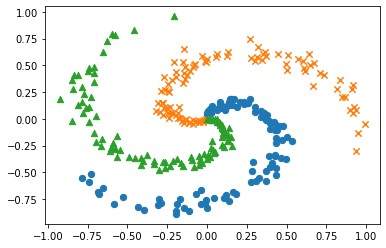

In [32]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 1.4.2 신경망 구현  

In [33]:
import sys
import numpy as np
#import Affine,Sigmoid,SoftmaxWithLoss
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        I,H,O=input_size,hidden_size,output_size
        #가중치와 편향초기화
        W1=0.01*np.random.randn(I,H)
        b1=np.zeros(H)
        W2=0.01*np.random.randn(H,O)
        b2=np.zeros(O)
        #계층 생성
        self.layers=[
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2)
        ]
        self.loss_layer=SoftmaxWithLoss()
        #모든 가중치와 기울기를 리스트에 저장
        self.params,self.grads=[],[]
        for layer in self.layers:
            self.params+=layer.params
            self.grads+=layer.grads
    def predict(self,x):
        for layer in self.layers:
            x=layer.forward(x)
        return x
    def forward(self,x,t):
        score=self.predict(x)
        loss=self.loss_layer.forward(score,t)
        return loss
    def backward(self,dout=1):
        dout=self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout=layer.backward(dout)
        return dout

## 1.4.3 학습용 코드  

In [34]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [35]:
# ch01/train_custom_loop.py
import sys
sys.path.append('..')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm  # pip install tqdm
from common.optimizer import SGD
from common import spiral
from two_layer_net import TwoLayerNet
matplotlib.rc('font', family='Malgun Gothic')  

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2,
                    hidden_size=hidden_size,
                    output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in tqdm(range(max_epoch)):
    # 3. 데이터 셔플링
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| 에폭 {epoch+1} | 반복{iters+1}/{max_iters} | 손실 {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

 31%|████████████████████████▌                                                       | 92/300 [00:00<00:00, 828.42it/s]

| 에폭 1 | 반복10/10 | 손실 1.13
| 에폭 2 | 반복10/10 | 손실 1.13
| 에폭 3 | 반복10/10 | 손실 1.12
| 에폭 4 | 반복10/10 | 손실 1.12
| 에폭 5 | 반복10/10 | 손실 1.11
| 에폭 6 | 반복10/10 | 손실 1.14
| 에폭 7 | 반복10/10 | 손실 1.16
| 에폭 8 | 반복10/10 | 손실 1.11
| 에폭 9 | 반복10/10 | 손실 1.12
| 에폭 10 | 반복10/10 | 손실 1.13
| 에폭 11 | 반복10/10 | 손실 1.12
| 에폭 12 | 반복10/10 | 손실 1.11
| 에폭 13 | 반복10/10 | 손실 1.09
| 에폭 14 | 반복10/10 | 손실 1.08
| 에폭 15 | 반복10/10 | 손실 1.04
| 에폭 16 | 반복10/10 | 손실 1.03
| 에폭 17 | 반복10/10 | 손실 0.96
| 에폭 18 | 반복10/10 | 손실 0.92
| 에폭 19 | 반복10/10 | 손실 0.92
| 에폭 20 | 반복10/10 | 손실 0.87
| 에폭 21 | 반복10/10 | 손실 0.85
| 에폭 22 | 반복10/10 | 손실 0.82
| 에폭 23 | 반복10/10 | 손실 0.79
| 에폭 24 | 반복10/10 | 손실 0.78
| 에폭 25 | 반복10/10 | 손실 0.82
| 에폭 26 | 반복10/10 | 손실 0.78
| 에폭 27 | 반복10/10 | 손실 0.76
| 에폭 28 | 반복10/10 | 손실 0.76
| 에폭 29 | 반복10/10 | 손실 0.78
| 에폭 30 | 반복10/10 | 손실 0.75
| 에폭 31 | 반복10/10 | 손실 0.78
| 에폭 32 | 반복10/10 | 손실 0.77
| 에폭 33 | 반복10/10 | 손실 0.77
| 에폭 34 | 반복10/10 | 손실 0.78
| 에폭 35 | 반복10/10 | 손실 0.75
| 에폭 36 | 반복10/10 | 손실 0.74
|

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 943.60it/s]

| 에폭 160 | 반복10/10 | 손실 0.20
| 에폭 161 | 반복10/10 | 손실 0.20
| 에폭 162 | 반복10/10 | 손실 0.20
| 에폭 163 | 반복10/10 | 손실 0.21
| 에폭 164 | 반복10/10 | 손실 0.20
| 에폭 165 | 반복10/10 | 손실 0.20
| 에폭 166 | 반복10/10 | 손실 0.19
| 에폭 167 | 반복10/10 | 손실 0.19
| 에폭 168 | 반복10/10 | 손실 0.19
| 에폭 169 | 반복10/10 | 손실 0.19
| 에폭 170 | 반복10/10 | 손실 0.19
| 에폭 171 | 반복10/10 | 손실 0.19
| 에폭 172 | 반복10/10 | 손실 0.18
| 에폭 173 | 반복10/10 | 손실 0.18
| 에폭 174 | 반복10/10 | 손실 0.18
| 에폭 175 | 반복10/10 | 손실 0.18
| 에폭 176 | 반복10/10 | 손실 0.18
| 에폭 177 | 반복10/10 | 손실 0.18
| 에폭 178 | 반복10/10 | 손실 0.18
| 에폭 179 | 반복10/10 | 손실 0.17
| 에폭 180 | 반복10/10 | 손실 0.17
| 에폭 181 | 반복10/10 | 손실 0.18
| 에폭 182 | 반복10/10 | 손실 0.17
| 에폭 183 | 반복10/10 | 손실 0.18
| 에폭 184 | 반복10/10 | 손실 0.17
| 에폭 185 | 반복10/10 | 손실 0.17
| 에폭 186 | 반복10/10 | 손실 0.18
| 에폭 187 | 반복10/10 | 손실 0.17
| 에폭 188 | 반복10/10 | 손실 0.17
| 에폭 189 | 반복10/10 | 손실 0.17
| 에폭 190 | 반복10/10 | 손실 0.17
| 에폭 191 | 반복10/10 | 손실 0.16
| 에폭 192 | 반복10/10 | 손실 0.17
| 에폭 193 | 반복10/10 | 손실 0.16
| 에폭 194 | 반복1

In [36]:
import numpy as np
np.random.permutation(10)#0~N-1까지 무작위로 순서 생성해서 반환

array([5, 1, 8, 4, 9, 7, 0, 2, 6, 3])

## 1.4.4 Trainer클래스  

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

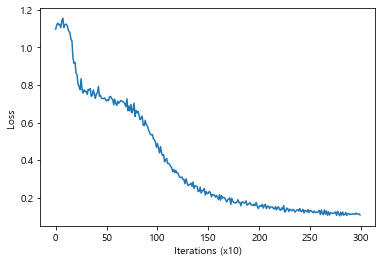

In [37]:
# ch01/train.py
%matplotlib inline
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from common import spiral

# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

# 1.5 계산 고속화  

## 1.5.1 비트 정밀도 
가장 일반적으로 64bit부동소수점 사용

In [38]:
import numpy as np
a=np.random.randn(3)
a.dtype

dtype('float64')

In [39]:
b=np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [40]:
c=np.random.randn(3).astype('f')#32bit부동소수점 사용하게 함
c.dtype

dtype('float32')

학습된 가중치 저장시에는 16bit부동소수점 수로 변환해서 사용!

## 1.5.2 쿠파이
CUDA:GPU전용 범용 병렬 컴퓨팅, 플랫폼 설치하고 사용  
쿠파이:  
- GPU를 이용해 병렬계산 수행하는 라이브러리